In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/cbse-result-statistics-class-xii-2023/class12-2023 (1).csv")
data.head(5)

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2023,Ajmer,Regd,0,4533,0,86178,3741,7736
1,12,2023,Ajmer,Appd,0,4524,0,85839,3730,7725
2,12,2023,Bhubaneswar,Regd,103,7746,0,69835,3823,11465
3,12,2023,Bhubaneswar,Appd,101,7688,0,69506,3809,11431
4,12,2023,Chandigarh,Regd,0,13060,55,89637,2549,5861


In [3]:
#concise summary of the dataset's characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        32 non-null     int64 
 1   Year         32 non-null     int64 
 2   Region       32 non-null     object
 3   Status       32 non-null     object
 4   CTSA         32 non-null     int64 
 5   GOVT         32 non-null     int64 
 6   GOVT AIDED   32 non-null     int64 
 7   INDEPENDENT  32 non-null     int64 
 8   JNV          32 non-null     int64 
 9   KV           32 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.6+ KB


In [4]:
data.describe()

,Class,Year,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
count,32.0,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,12.0,2023.0,24.718750,14191.093750,954.031250,66485.000000,2239.718750,5780.406250
std,0.0,0.0,48.989291,28127.835341,2376.553258,34090.505329,1375.149311,2332.043488
min,12.0,2023.0,0.000000,70.000000,0.000000,12214.000000,65.000000,2361.000000
25%,12.0,2023.0,0.000000,337.250000,0.000000,38593.250000,1105.000000,4146.750000
50%,12.0,2023.0,0.000000,2346.500000,0.000000,66326.500000,2063.000000,5626.500000
75%,12.0,2023.0,9.500000,9065.750000,66.500000,86962.750000,3647.250000,6966.000000
max,12.0,2023.0,164.000000,100216.000000,7775.000000,131729.000000,4536.000000,11465.000000


In [5]:
data.isnull().sum()

Class          0
Year           0
Region         0
Status         0
CTSA           0
GOVT           0
GOVT AIDED     0
INDEPENDENT    0
JNV            0
KV             0
dtype: int64

In [6]:
print(data['Class'].unique())
print(data['Year'].unique())
print(data['Region '].unique())
print(data['Status'].unique())

[12]
[2023]
['Ajmer' 'Bhubaneswar' 'Chandigarh' 'Delhi East' 'Pune' 'Guwahati'
 'Panchkula' 'Bengaluru' 'Bhopal' 'Chennai' 'Noida' 'Patna' 'Prayagraj'
 'Trivandrum' 'Dehradun' 'Delhi West']
['Regd' 'Appd']


In [7]:
#a new column 'sum_column' that is the summation of all columns row-wise
data['sum_column'] = data[['CTSA', 'GOVT', 'GOVT AIDED', 'INDEPENDENT', 'JNV', 'KV']].sum(axis=1)
data.head(10)

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV,sum_column
0,12,2023,Ajmer,Regd,0,4533,0,86178,3741,7736,102188
1,12,2023,Ajmer,Appd,0,4524,0,85839,3730,7725,101818
2,12,2023,Bhubaneswar,Regd,103,7746,0,69835,3823,11465,92972
3,12,2023,Bhubaneswar,Appd,101,7688,0,69506,3809,11431,92535
4,12,2023,Chandigarh,Regd,0,13060,55,89637,2549,5861,111162
5,12,2023,Chandigarh,Appd,0,13025,55,89317,2537,5844,110778
6,12,2023,Delhi East,Regd,0,100216,6420,64953,81,6669,178339
7,12,2023,Delhi East,Appd,0,99566,6393,64774,81,6661,177475
8,12,2023,Pune,Regd,0,1535,0,22801,1673,4859,30868
9,12,2023,Pune,Appd,0,1534,0,22742,1662,4849,30787


### **Overall Performance Analysis**

What is the overall pass rate for the CBSE Class XI examinations in 2023?

In [8]:
status_regd = 'Regd'
status_appd = 'Appd'

sum_of_regd = data.loc[data['Status'] == status_regd, 'sum_column'].sum()
sum_of_appd = data.loc[data['Status'] == status_appd, 'sum_column'].sum()

# Step 2: Calculate the total summation of all data points
total_sum = data['sum_column'].sum()

# Step 3: Calculate the percentage
percent_regd = round((sum_of_regd / total_sum) * 100,2)
percent_appd = round((sum_of_appd / total_sum) * 100,2)

print("Overall rate for Regd: ",percent_regd)
print("Overall rate for Appd: ",percent_appd)

Overall rate for Regd:  50.14
Overall rate for Appd:  49.86


Are there significant variations in pass rates across different regions?

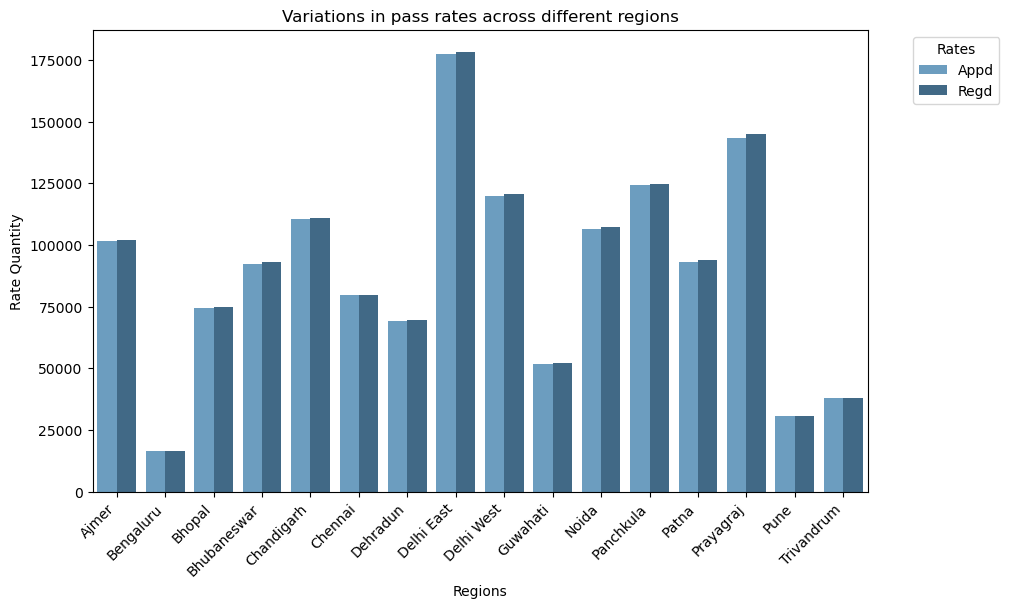

In [9]:
rates_variations = data.loc[:, ['Region ', 'Status', 'sum_column']].groupby(['Region ', 'Status']).max().reset_index()

# Convert the values to integers
rates_variations['sum_column'] = rates_variations['sum_column'].astype(int)

#rename the columns for better understanding
rates_variations.columns = ['Region', 'Status', 'sum_column']

#plotting figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='sum_column', data=rates_variations, hue='Status', palette='Blues_d')
plt.title('Variations in pass rates across different regions')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Regions')
plt.ylabel('Rate Quantity')
# Move legend outside the plot
plt.legend(title='Rates', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **School Type Analysis**

How do different types of schools (e.g., CTSA, JNV, KV, government-aided, independent) perform in terms of pass rates?

How do different types of schools (e.g., CTSA, JNV, KV, government-aided, independent) perform in terms of pass rates?

### **Regional Analysis**

Which regions have the highest and lowest pass rates?

Are there any regional patterns or disparities in student performance?

### **Student Participation**

What is the relationship between the number of registered students and the number of students who appeared for the exams?

Are there regions or school types with particularly high or low participation rates?Are there regions or school types with particularly high or low participation rates?

### **Gender Analysis**

Is there a gender-based breakdown of student performance?

Do male and female students have different pass rates, and how does this vary across regions and school types?

### **Status vs. Region**

What is the distribution of pass and fail statuses across different regions?

Are there regions with a higher percentage of successful students?

### **Status vs. School Type**

How does the pass/fail status vary among different types of schools?

Are certain school types more successful in terms of student performance?

### **Relationships Between Variables**

Is there a correlation between the number of registered students and the pass rate?

Are there any other notable relationships or correlations between variables in the dataset?